In [74]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [106]:
dataset_path = "/content/drive/MyDrive/7-7 dataset"

In [107]:
img_data_generator = ImageDataGenerator(
    rescale=1./255 ,
    validation_split=0.1,
    horizontal_flip=True
)
train_data= img_data_generator.flow_from_directory(
    dataset_path ,
    shuffle=True,
    subset="training",
    target_size=(299,299)
)

validation_data = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(299,299)
)

Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [108]:
model = tf.keras.applications.InceptionResNetV2(weights="imagenet" , include_top=False , input_shape=(299,299,3)) 
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_609 (Conv2D)         (None, 149, 149, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_609 (B  (None, 149, 149, 32)         96        ['conv2d_609[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_609 (Activation  (None, 149, 149, 32)         0         ['batch_norm

# Adding fully connected layers to model :

In [109]:
model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dense(14 , activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 98304)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               50332160  
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 14)                3598      
                                                                 
Total params: 104803822 (399.79 MB)
Trainable params: 104743278 (399.56 MB)
Non-trainable params: 60544 (236.50 KB)
____

In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss=tf.keras.losses.categorical_crossentropy ,
              metrics=["accuracy"] )

In [111]:
history = model.fit(train_data , validation_data=validation_data , epochs=15)


Epoch 1/15
39/39 [==============================] - 141s 1s/step - loss: 5.5840 - accuracy: 0.0839 - val_loss: 2.6367 - val_accuracy: 0.0763
Epoch 2/15
39/39 [==============================] - 42s 1s/step - loss: 2.6005 - accuracy: 0.0962 - val_loss: 83.1178 - val_accuracy: 0.0916
Epoch 3/15
39/39 [==============================] - 42s 1s/step - loss: 2.0650 - accuracy: 0.3733 - val_loss: 4.6736 - val_accuracy: 0.2748
Epoch 4/15
39/39 [==============================] - 42s 1s/step - loss: 1.3046 - accuracy: 0.6202 - val_loss: 2.0204 - val_accuracy: 0.4962
Epoch 5/15
39/39 [==============================] - 42s 1s/step - loss: 0.6693 - accuracy: 0.7816 - val_loss: 1.2136 - val_accuracy: 0.6183
Epoch 6/15
39/39 [==============================] - 42s 1s/step - loss: 0.4350 - accuracy: 0.8663 - val_loss: 0.7104 - val_accuracy: 0.7710
Epoch 7/15
39/39 [==============================] - 42s 1s/step - loss: 0.3400 - accuracy: 0.9046 - val_loss: 3.9516 - val_accuracy: 0.7634
Epoch 8/15
39/39 [

In [112]:
model.save("/content/face_rec_weights.h5")
model.save("/content/face_rec_weights.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


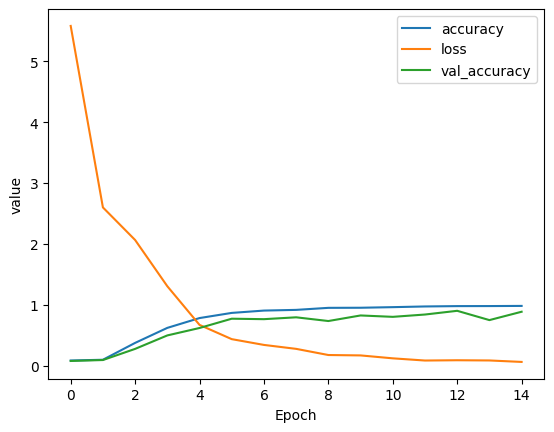

In [113]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","loss" , "val_accuracy" , "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [115]:
validation_data.class_indices

{'Ali_Khamenei': 0,
 'Angelina_Jolie': 1,
 'Barak_Obama': 2,
 'Behnam_Bani': 3,
 'Donald_Trump': 4,
 'Emma_Watson': 5,
 'Han_Hye_Jin': 6,
 'Kim_Jong_Un': 7,
 'Leyla_Hatami': 8,
 'Lionel_Messi': 9,
 'Michelle_Obama': 10,
 'Morgan_Freeman': 11,
 'Queen_Elizabeth': 12,
 'Scarlett_Johansson': 13}

In [116]:
validation_data.samples

131

In [176]:
validation_data.batch_size

32

## به تعداد ۱۳۱ عدد نمونه ولیدیشن داریم
## در حالی که بچ سایز برابر با ۳۲
### این یعنی ولیدیشن دیتا اینجوری تقسیم بندی میتونه بشه

### بچ سایز اول ۳۲ تا -->  validation_data[0]
### بچ سایز دوم ۳۲ تا -->  validation_data[1]
### بچ سایز سوم ۳۲ تا -->  validation_data[2]
### بچ سایز چهارم ۳ تا ->  validation_data[3]



In [ ]:
images,labels = validation_data[2]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))

In [185]:
np.array(ytrue_list)

array([11,  9,  6,  0,  8, 12,  8, 11,  2, 13, 12,  2,  7,  3,  6,  4,  3,
       13,  8, 10,  4,  3,  1, 11,  2,  6,  5,  8,  1, 13,  9,  1])

In [186]:
batchsize = np.array(ytrue_list)
batchsize.shape

(32,)

In [187]:
np.array(ypred_list)

array([11,  9,  6,  0,  8, 12,  1,  4,  2, 13, 12,  2,  7,  3,  6,  4,  3,
       13,  8, 10,  4,  3,  1, 11,  4,  6,  5,  8,  1, 13,  9,  1])

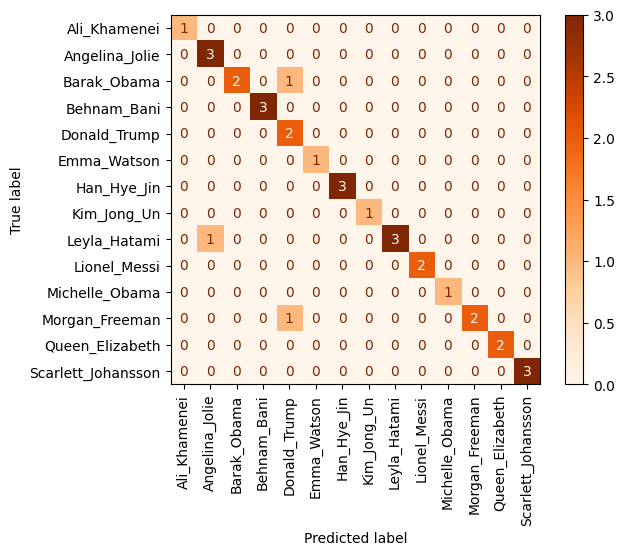

In [193]:
confm = metrics.confusion_matrix(y_true= ytrue_list , y_pred= ypred_list  )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confm , display_labels=['Ali_Khamenei', 'Angelina_Jolie', 'Barak_Obama', 'Behnam_Bani', 'Donald_Trump', 'Emma_Watson', 'Han_Hye_Jin', 'Kim_Jong_Un', 'Leyla_Hatami', 'Lionel_Messi', 'Michelle_Obama', 'Morgan_Freeman', 'Queen_Elizabeth', 'Scarlett_Johansson'])
cm_display.plot(cmap=plt.cm.Oranges , xticks_rotation="vertical")
plt.show()

# Inference

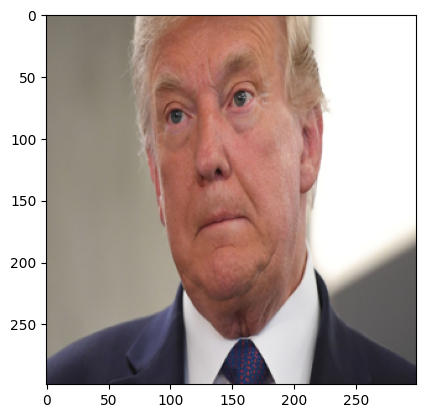

In [189]:
from PIL import Image
import cv2
image = Image.open("/content/trump1.jpg")
new_image = image.resize((299,299))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [190]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 299, 299, 3])
print(img.shape)
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_data.class_indices)
mylist = list(train_data.class_indices)
print("predicted label : " , mylist[np.argmax(output)])

(299, 299, 3)
(1, 299, 299, 3)
1/1 [==============================] - 0s 42ms/step
4
{'Ali_Khamenei': 0, 'Angelina_Jolie': 1, 'Barak_Obama': 2, 'Behnam_Bani': 3, 'Donald_Trump': 4, 'Emma_Watson': 5, 'Han_Hye_Jin': 6, 'Kim_Jong_Un': 7, 'Leyla_Hatami': 8, 'Lionel_Messi': 9, 'Michelle_Obama': 10, 'Morgan_Freeman': 11, 'Queen_Elizabeth': 12, 'Scarlett_Johansson': 13}
predicted label :  Donald_Trump
